In my work, I've recently come across an interesting topic, complex analysis, which studies functions defined by complex numbers in the complex plane.

In particular, I've recently come across an interesting phenomenon, called branch cuts. The goal of this notebook is to understand branch cuts in the context of the complex square root, which is an extension of the familiar square root function.

This notebook is mainly inspired by two documents: this [math discussion on stackexchange about branch cuts](http://math.stackexchange.com/questions/925036/understanding-branch-cuts-by-manually-choosing-the-branch-cuts-of-a-function) and the introduction of the [PhD Thesis of Benjamin Goursaud](http://uma.ensta-paristech.fr/uma2/publis/show.html?id=1104).

# What's a branch cut? 

To quote [Mathworld](http://mathworld.wolfram.com/BranchCut.html):

>A branch cut is a curve (with ends possibly open, closed, or half-open) in the complex plane across which an analytic multivalued function is discontinuous

A term that is perplexing at first is the one of a multivalued function. We'll see what this means in a moment when we talk about the square root.

# What's the square root of a complex number? 

Everyone knows the square function:

$$
f(z) = z^2
$$

This function maps any complex number to another complex number. 

What about its inverse function? Given a complex number $z$, can I find another complex number ("$\sqrt{z}$") that when squared, returns $z$?

It turns out that this is possible. For instance, writing $z$ as $r \exp(i \, \varphi)$, one can use the following formula for its square root:

$$
\sqrt{z} = \sqrt{r} \exp{i \, \varphi \over 2}
$$

However, it turns out that the big question in this definition is about how I define $\varphi$. I can add or substrat $2 \pi$ to the argument and still map to the same complex number. This is where the notion of [principal value](http://mathworld.wolfram.com/PrincipalValue.html) comes in. The principal value is the one we choose as a default when several values are possible. 

So in the case of the argument of a complex number, we choose it in the interval $[-\pi, \pi]$ which introduces a discontinuity along the negative real line. This discontinuity in the choice of the argument carries over to the square root definition.

In the next section, we will visualize this discontinuity.

# Visualization time!

Now that we have explained the problem, let's use a graphical approach to understand it more intuitively.

In [33]:
# usual imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.style.use('seaborn-white')

We'll start by defining the normal square root: the one made available in the numpy package.

In [19]:
def numpy_sqrt(z):
    "Complex square root function."
    return np.sqrt(z)

To better look at this function behaviour, we will define two plotting functions: one that allows use to do 3d plots and one that is a colored 2d plot using [domain coloring](http://nbviewer.jupyter.org/github/empet/Math/blob/master/DomainColoring.ipynb).

First, the 3d plot:

In [20]:
from mpl_toolkits.mplot3d import Axes3D

def argand_plot(func):
    "Plots a function in the Argand (complex) plane."
    X, Y = np.meshgrid(np.linspace(-2, 2),
                      np.linspace(-2, 2))
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel('real axis')
    ax1.set_ylabel('imaginary axis')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel('real axis')
    ax2.set_ylabel('imaginary axis')
    ax2.set_title('imaginary part')

And the 2d plot:

In [21]:
import domain_coloring as dc

def domain_coloring_plot(func):
    "Domain coloring of function func."
    dc.plot_domain(dc.classical_domaincol, func, re=[-2, 2], im=[-2, 2], daxis=True)

Let's now visualize the square root in the complex plane:

In [35]:
plt.rcParams['figure.figsize'] = (6, 7)

<IPython.core.display.Javascript object>


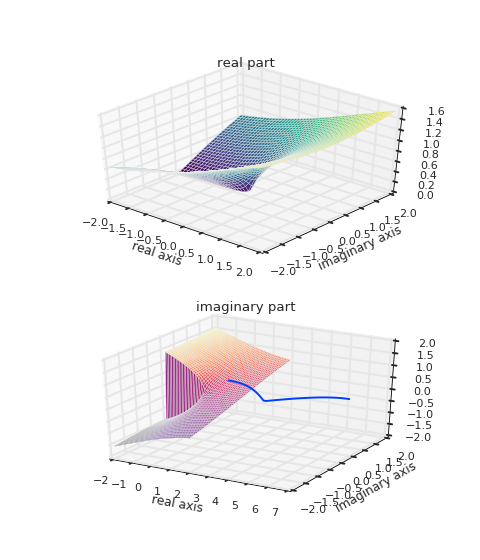

In [36]:
plt.figure()
argand_plot(numpy_sqrt)

<IPython.core.display.Javascript object>


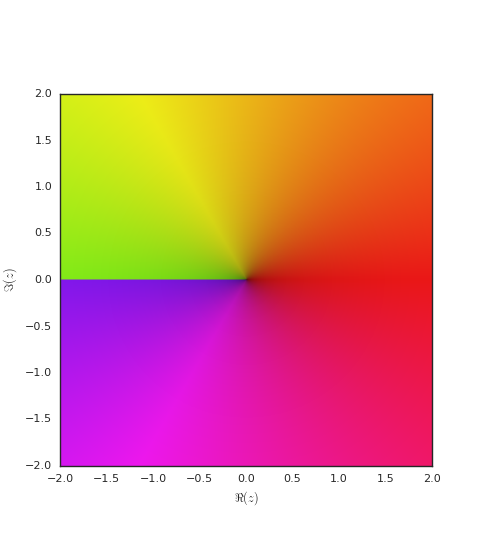

In [37]:
plt.figure()
domain_coloring_plot(numpy_sqrt)

What we see in the above plot is that our square root has a discontinuitiy along the real negative line. This is due to the choice of the argument as explained in the previous section and is what is properly called the **branch cut** of this function.

However, now that we know where this comes from, we can choose to introduce this discontinuity at other locations.

# Looking into the discontinuity

As seen above, the standard square root function has a branch cut along the negative reals. Sometimes, this can be problematic. In particular, if you were to follow the unit circle in a given direction, you would encounter a discontinuity. Let's illustrate that problem by a plot:

In [74]:
theta = np.linspace(0, 2 * np.pi, num=26, endpoint=False)
unit_circle = [np.exp(1j * _) for _ in theta]

In [81]:
def plot_along_curve(func=numpy_sqrt, param=theta, curve=unit_circle):
    "Plots curve and real/imag values of function func along given curve."
    plt.subplot(121)
    plt.plot(np.real(curve), np.imag(curve), 'o')
    x = np.real(curve)
    y = np.imag(curve)
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    domain_coloring_plot(func)
    plt.subplot(122)
    plt.plot(param, np.imag(func(curve)), label='imaginary part')
    plt.plot(param, np.real(func(curve)), label='real part')
    plt.legend(loc='lower left')
    plt.xlabel('angle $\\theta$ along the circle (rad)')

<IPython.core.display.Javascript object>


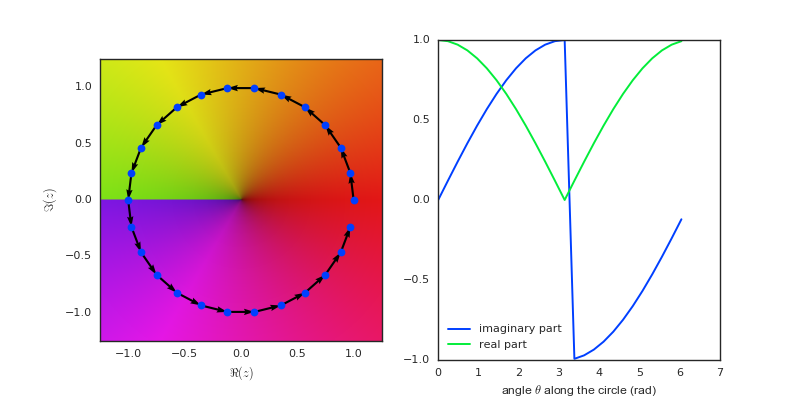

In [82]:
plt.figure(figsize=(10, 5))
plot_along_curve()

As can be seen in the plot (kudos to [StackOverflow](http://stackoverflow.com/questions/7519467/line-plot-with-arrows-in-matplotlib) for the arrows), the problem is the discontinuity occuring at angle $\pi$. It is seen in the imaginary part, while the real part is continuous. If we need to cross this location, for instance while performing an integral, we will often need to do this continuously. One solution to this need can be to pick a different definition of the square root, as we will explain in the next section.

# Defining many square root function  

We can use a bit of mathematics to define a different square root function, in terms of the branch cut. It all starts with the angle of a complex number, which we need to recast in another interval using a plus minus operation as well as a remainder operation.

Our generalized square root will be:

$$
\sqrt[\uproot{2}\theta]{z} = \sqrt{|z|}  \exp{i \, \arg_\theta z \over 2}
$$

Here the particularly interesting part is the $\arg_\theta z$ function which returns the argument of the complex number $z$ in the following range:

$$
\theta - 2 \pi < \arg_\theta z < \theta
$$

In [90]:
def square_root(z, theta):
    "Square root with different branch cut defined by alpha parameter."
    argument = np.angle(z) # between -pi and +pi
    modulus = np.abs(z)
    argument = np.mod(argument + theta, 2 * np.pi) - theta
    return np.sqrt(modulus) * np.exp(1j * argument / 2)

Using $\pi$ as the value for $\theta$ should allow us to define a function that gives identical values than the square root function we used above:

In [93]:
normal_sqrt = lambda z: square_root(z, np.pi)

Let's check that it gives the correct values on the unit circle:

In [98]:
np.allclose(np.abs(normal_sqrt(unit_circle)),
            np.abs(numpy_sqrt(unit_circle)))

True

Let's now plot it, to be sure:

<IPython.core.display.Javascript object>


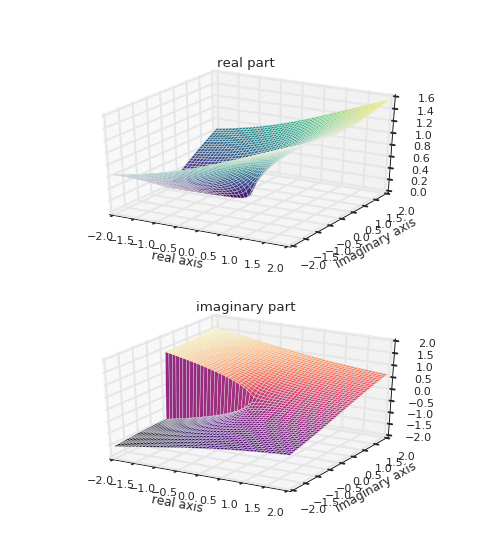

In [99]:
plt.figure()
argand_plot(normal_sqrt)

<IPython.core.display.Javascript object>


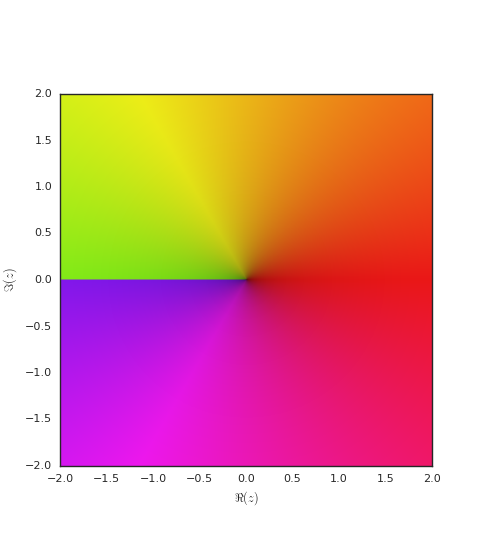

In [88]:
plt.figure()
domain_coloring_plot(normal_sqrt)

# Putting the branch cut on the real line 

However, our branched square root function is much more powerful. It can allow us to shift the discontinuity along any line starting at 0. For instance to the real positive line:

In [100]:
real_pos_sqrt = lambda z: square_root(z, 2 *np.pi)

<IPython.core.display.Javascript object>


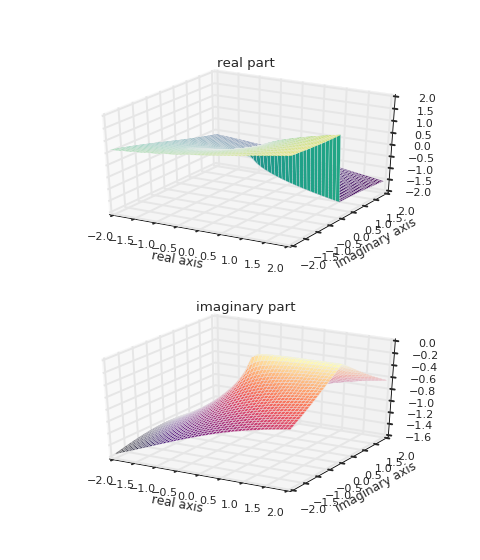

In [101]:
plt.figure()
argand_plot(real_pos_sqrt)

<IPython.core.display.Javascript object>


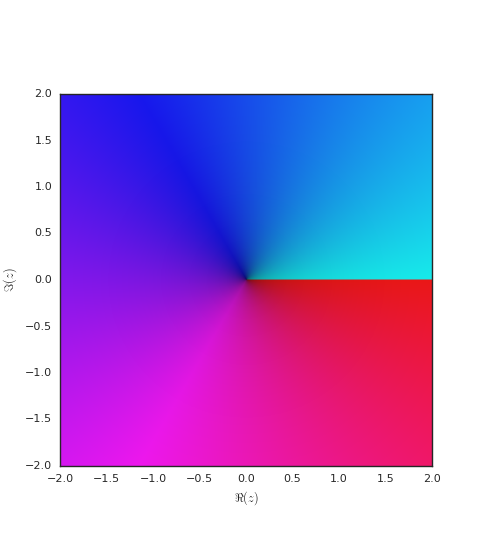

In [102]:
plt.figure()
domain_coloring_plot(real_pos_sqrt)

<IPython.core.display.Javascript object>


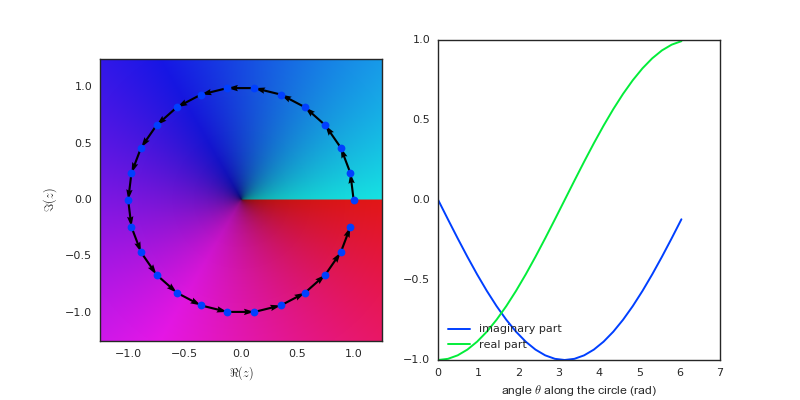

In [103]:
plt.figure(figsize=(10, 5))
plot_along_curve(func=real_pos_sqrt)

# Putting the branch cut on the imaginary line 

In the same manner, we can put the discontinuity along the imaginary line:

In [106]:
imag_neg_sqrt = lambda z: square_root(z, np.pi/2)

<IPython.core.display.Javascript object>


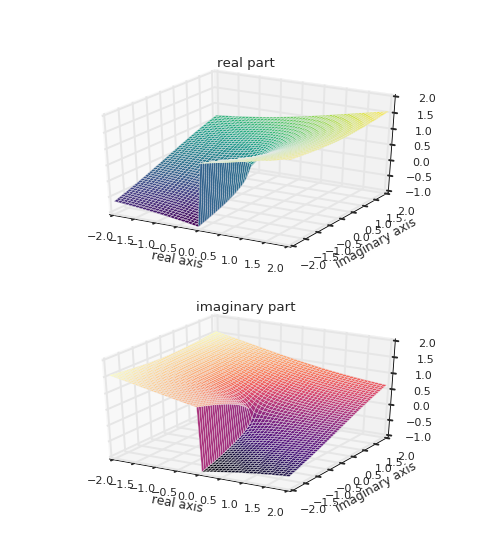

In [107]:
plt.figure()
argand_plot(imag_neg_sqrt)

<IPython.core.display.Javascript object>


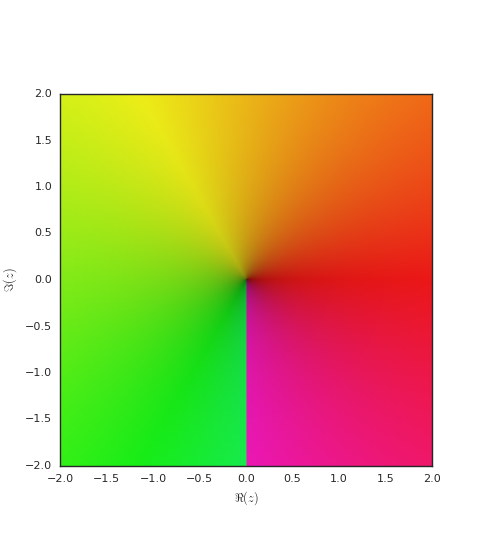

In [108]:
plt.figure()
domain_coloring_plot(imag_neg_sqrt)

<IPython.core.display.Javascript object>


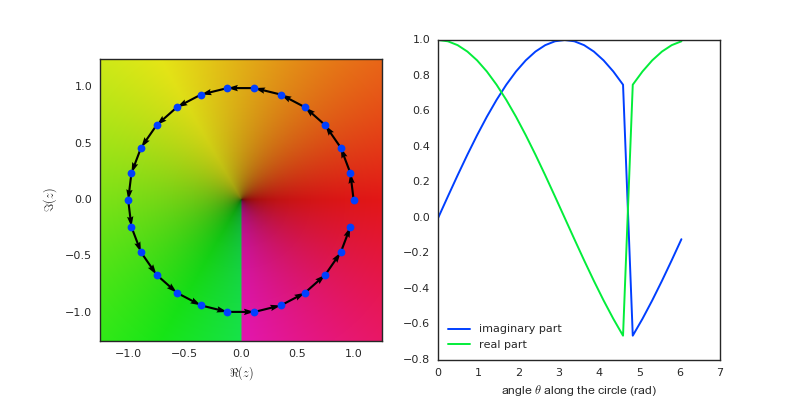

In [109]:
plt.figure(figsize=(10, 5))
plot_along_curve(func=imag_neg_sqrt)

# Adding an angle 

Finally, we can do the same thing at an angle, for example $\pi \over 4$.

In [110]:
angle_sqrt = lambda z: square_root(z, -np.pi/4)

<IPython.core.display.Javascript object>


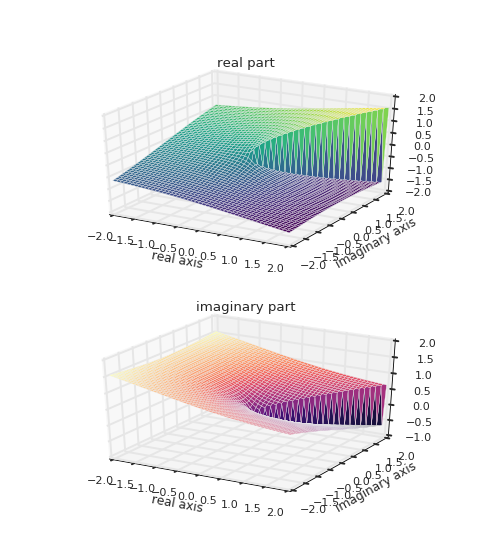

In [111]:
plt.figure()
argand_plot(angle_sqrt)

<IPython.core.display.Javascript object>


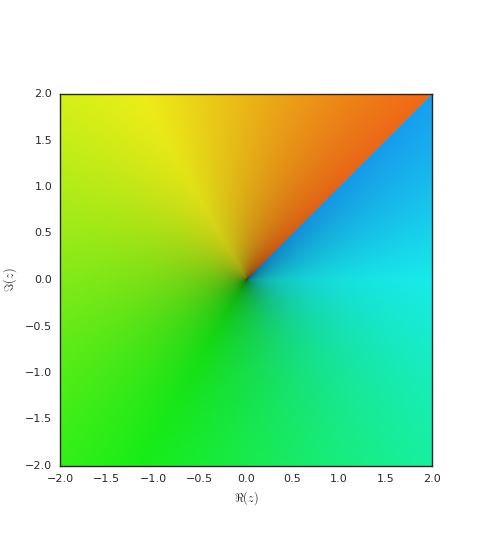

In [112]:
plt.figure()
domain_coloring_plot(angle_sqrt)

<IPython.core.display.Javascript object>


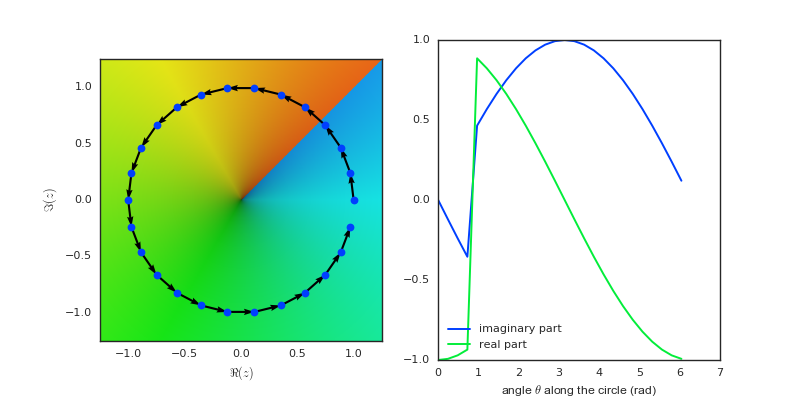

In [113]:
plt.figure(figsize=(10, 5))
plot_along_curve(func=angle_sqrt)

# Conclusions 

In this post, we've taken a close look at complex squareroots. In particular, we've shown that the square root is far from a "simple function". It has multiple possible values, which can be appropriately chosen depending on your application.

But you might ask: why is this important? Can't I use the default square root all the time.

Well, it depends. In my research, I was recently trying to integrate a function that contains a square root of complex numbers. Due to the default branch cut, this square root generates a discontinuity along the path that I want to integrate on. By redefining the square root to different branch cuts, I'm able to avoid these effects.